In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'european_starling_gentner_segmented'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [7]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=20000,
    butter_lowcut = 500,
    butter_highcut = 20000,
    ref_level_db = 20,
    min_level_db = -45,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:   21.3s


[Parallel(n_jobs=-1)]: Done 3805 out of 3805 | elapsed:   36.5s finished


In [9]:
dataset.sample_json

OrderedDict([('species', 'Lonchura striata domestica'),
             ('common_name', 'Sturnus vulgaris'),
             ('indvs',
              OrderedDict([('b1076',
                            OrderedDict([('syllables',
                                          OrderedDict([('start_times',
                                                        [6.543,
                                                         8.411,
                                                         10.49,
                                                         10.679,
                                                         11.111,
                                                         12.26,
                                                         12.728,
                                                         13.935,
                                                         14.582,
                                                         14.961,
                                                         15.38

In [10]:
len(dataset.data_files)

3805

#### Create dataset based upon JSON

In [11]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [12]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=[],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1910s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1560s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1649s.) Setting batch_

[Parallel(n_jobs=-1)]: Done 3805 out of 3805 | elapsed:   12.9s finished


164236

In [13]:
syllable_df[:3]

start_time  end_time   indv  indvi                         key
0       6.543     7.913  b1076      0  2017-09-01_19-19-15-490000
1       8.411     9.894  b1076      0  2017-09-01_19-19-15-490000
2      10.490    10.678  b1076      0  2017-09-01_19-19-15-490000

### get audio for dataset

In [14]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 3731 out of 3731 | elapsed:  4.3min finished


164236

In [15]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [16]:
syllable_df = syllable_df[np.array(df_mask)]

In [17]:
syllable_df[:3]

start_time  end_time   indv  indvi                         key  \
0       6.543     7.913  b1076      0  2017-09-01_19-19-15-490000   
1       8.411     9.894  b1076      0  2017-09-01_19-19-15-490000   
2      10.490    10.678  b1076      0  2017-09-01_19-19-15-490000   

                                               audio   rate  
0  [-0.005154066001708394, -0.005704246458768492,...  44100  
1  [-0.001935897874210309, -0.0013357296711965973...  44100  
2  [-0.0030737903364848767, -0.01259128192661638,...  44100

In [18]:
sylls = syllable_df.audio.values

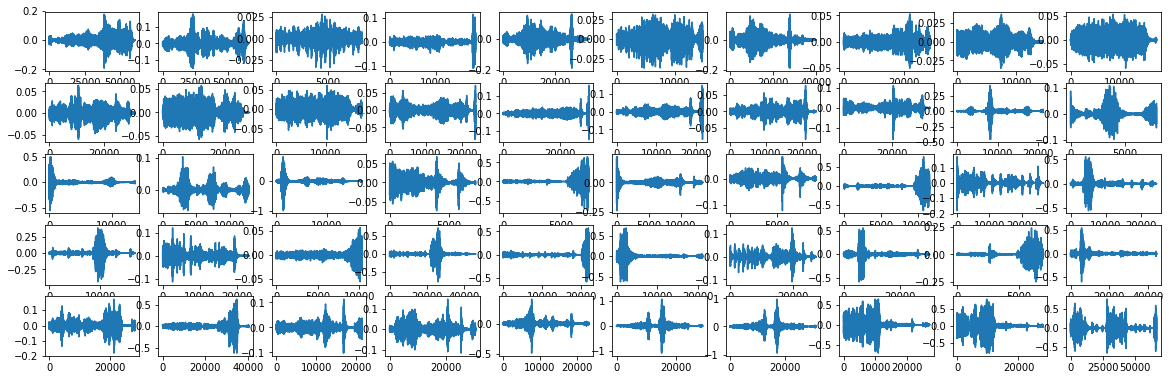

In [19]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

In [20]:
syllable_df['audio'] = [i/np.max(i) for i in syllable_df.audio.values]

### Create spectrograms

In [21]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [22]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [23]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0745s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1562s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1010 tasks      | elapsed:    1.3s
[Parallel(n

[Parallel(n_jobs=-1)]: Done 89930 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 91280 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 92650 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 94020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 95410 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 96800 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 98210 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 99620 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 101050 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 102480 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 103930 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 105380 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 106850 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 108320 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 109810 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11130

[Parallel(n_jobs=-1)]: Done 164234 out of 164234 | elapsed:  2.5min finished


### Rescale spectrogram
- using log rescaling

In [24]:
log_scaling_factor = 4

In [25]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0188s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1640s.) Setting batch_size=48.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4704 tasks      | elapsed:    1.2s
[Paral

[Parallel(n_jobs=-1)]: Done 164234 out of 164234 | elapsed:   34.0s finished


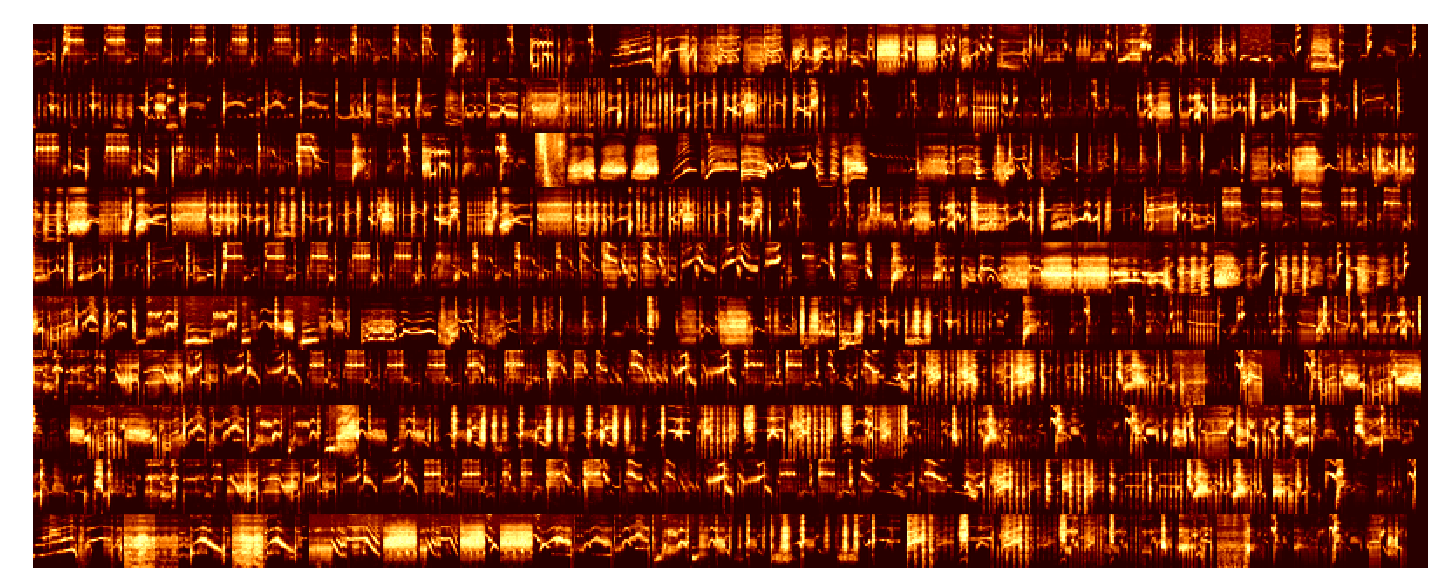

In [26]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

### Pad spectrograms

In [27]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [28]:
syllable_df[:3]

start_time  end_time   indv  indvi                         key  \
0       6.543     7.913  b1076      0  2017-09-01_19-19-15-490000   
1       8.411     9.894  b1076      0  2017-09-01_19-19-15-490000   
2      10.490    10.678  b1076      0  2017-09-01_19-19-15-490000   

                                               audio   rate  
0  [-0.02892994254441493, -0.0320181236050635, -0...  44100  
1  [-0.010974920486862508, -0.007572469151713682,...  44100  
2  [-0.10821866418125063, -0.44330014778633314, -...  44100

In [29]:
import seaborn as sns

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


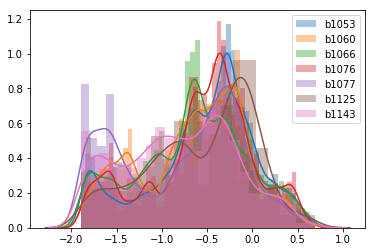

In [30]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"] - syllable_df[syllable_df.indv==indv]["start_time"]), label=indv)
plt.legend()

In [31]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1791s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0322s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1188s.) Setting batch_size=80.
[Parallel(n_jobs=-1)]: Done 639 tasks      | elapsed

[Parallel(n_jobs=-1)]: Done 164234 out of 164234 | elapsed:   20.9s finished


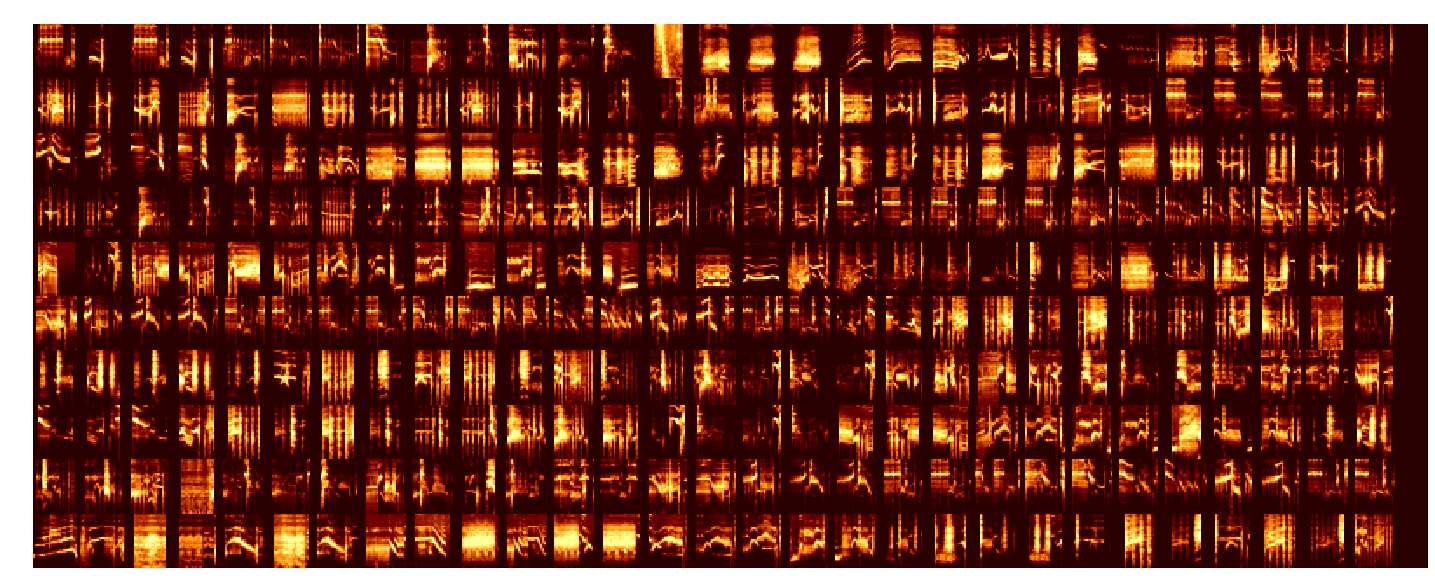

In [32]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [33]:
np.shape(syllables_spec)

(164234, 32, 27)

In [34]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

In [35]:
# convert to uint8 to save space
syllable_df['spectrogram'] = syllables_spec

In [36]:
syllable_df[:3]

start_time  end_time   indv  indvi                         key  \
0       6.543     7.913  b1076      0  2017-09-01_19-19-15-490000   
1       8.411     9.894  b1076      0  2017-09-01_19-19-15-490000   
2      10.490    10.678  b1076      0  2017-09-01_19-19-15-490000   

                                               audio   rate  \
0  [-0.02892994254441493, -0.0320181236050635, -0...  44100   
1  [-0.010974920486862508, -0.007572469151713682,...  44100   
2  [-0.10821866418125063, -0.44330014778633314, -...  44100   

                                         spectrogram  
0  [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, ...  
1  [[47, 24, 37, 40, 17, 10, 6, 6, 6, 6, 6, 6, 6,...  
2  [[0, 0, 0, 0, 103, 115, 118, 103, 132, 147, 16...

### view syllables per indv

In [37]:
syllable_df.indv.unique()

array(['b1076', 'b1060', 'b1125', 'b1077', 'b1066', 'b1053', 'b1143'],
      dtype=object)

b1053 24110


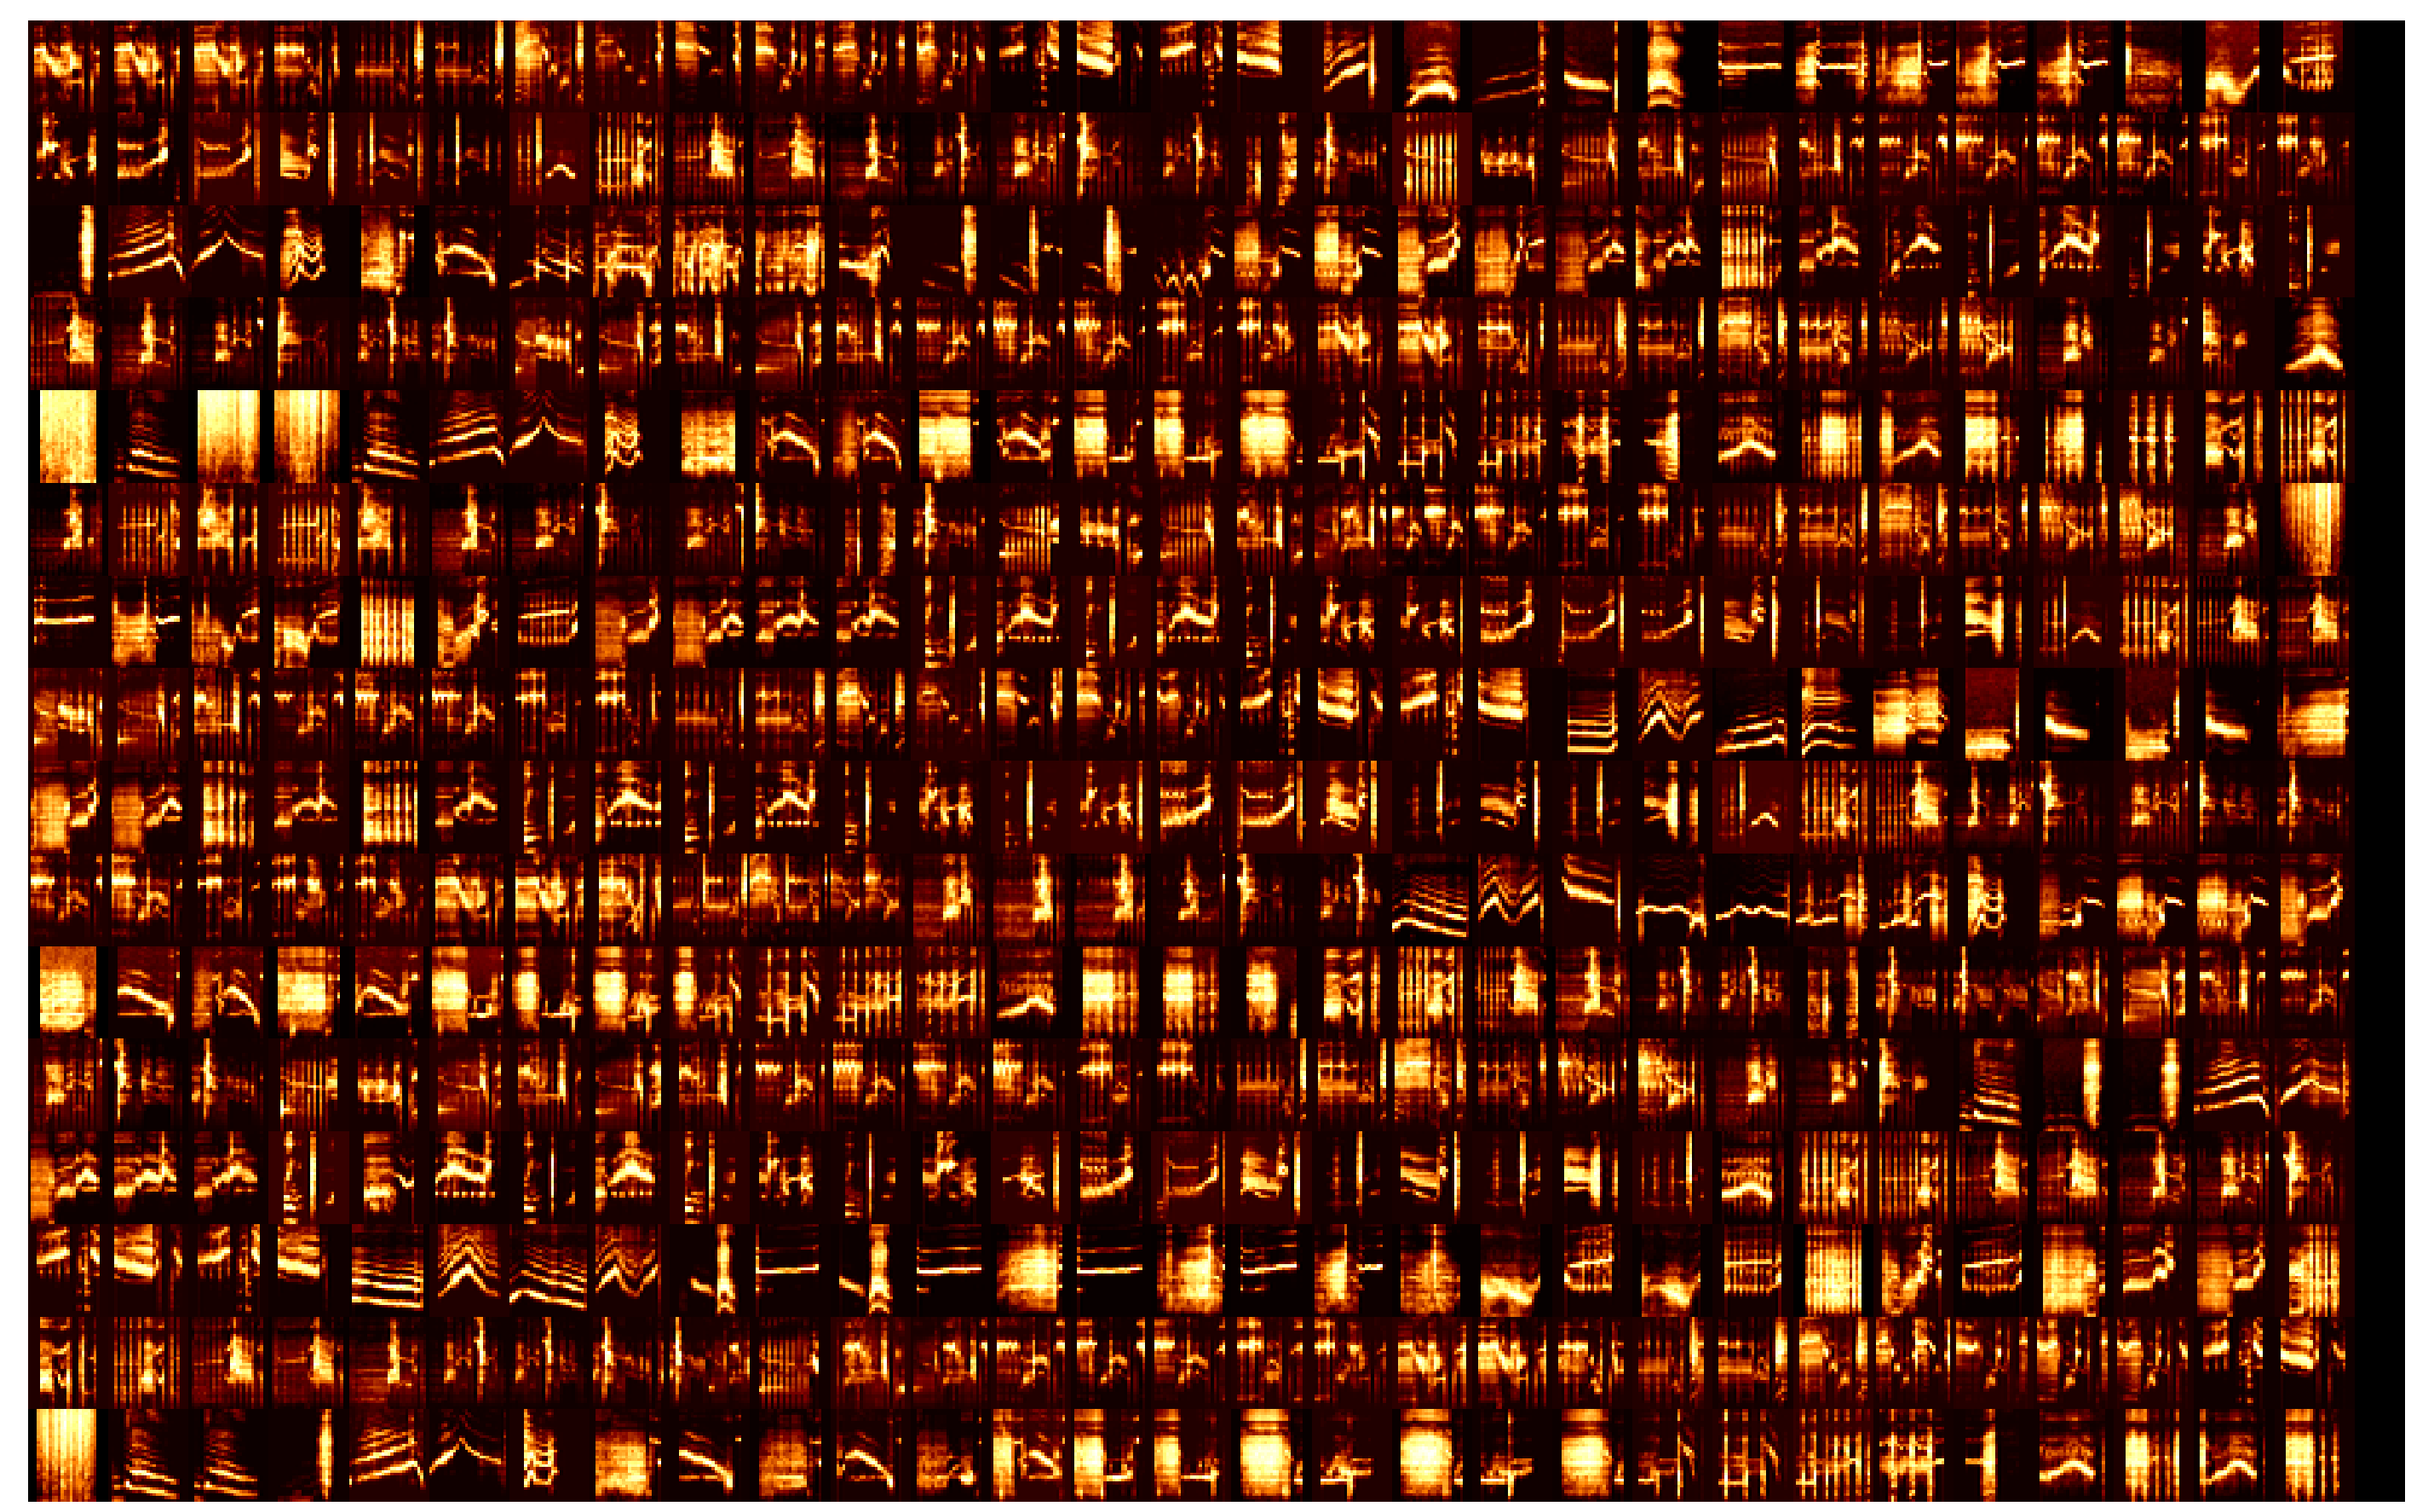

b1060 65871


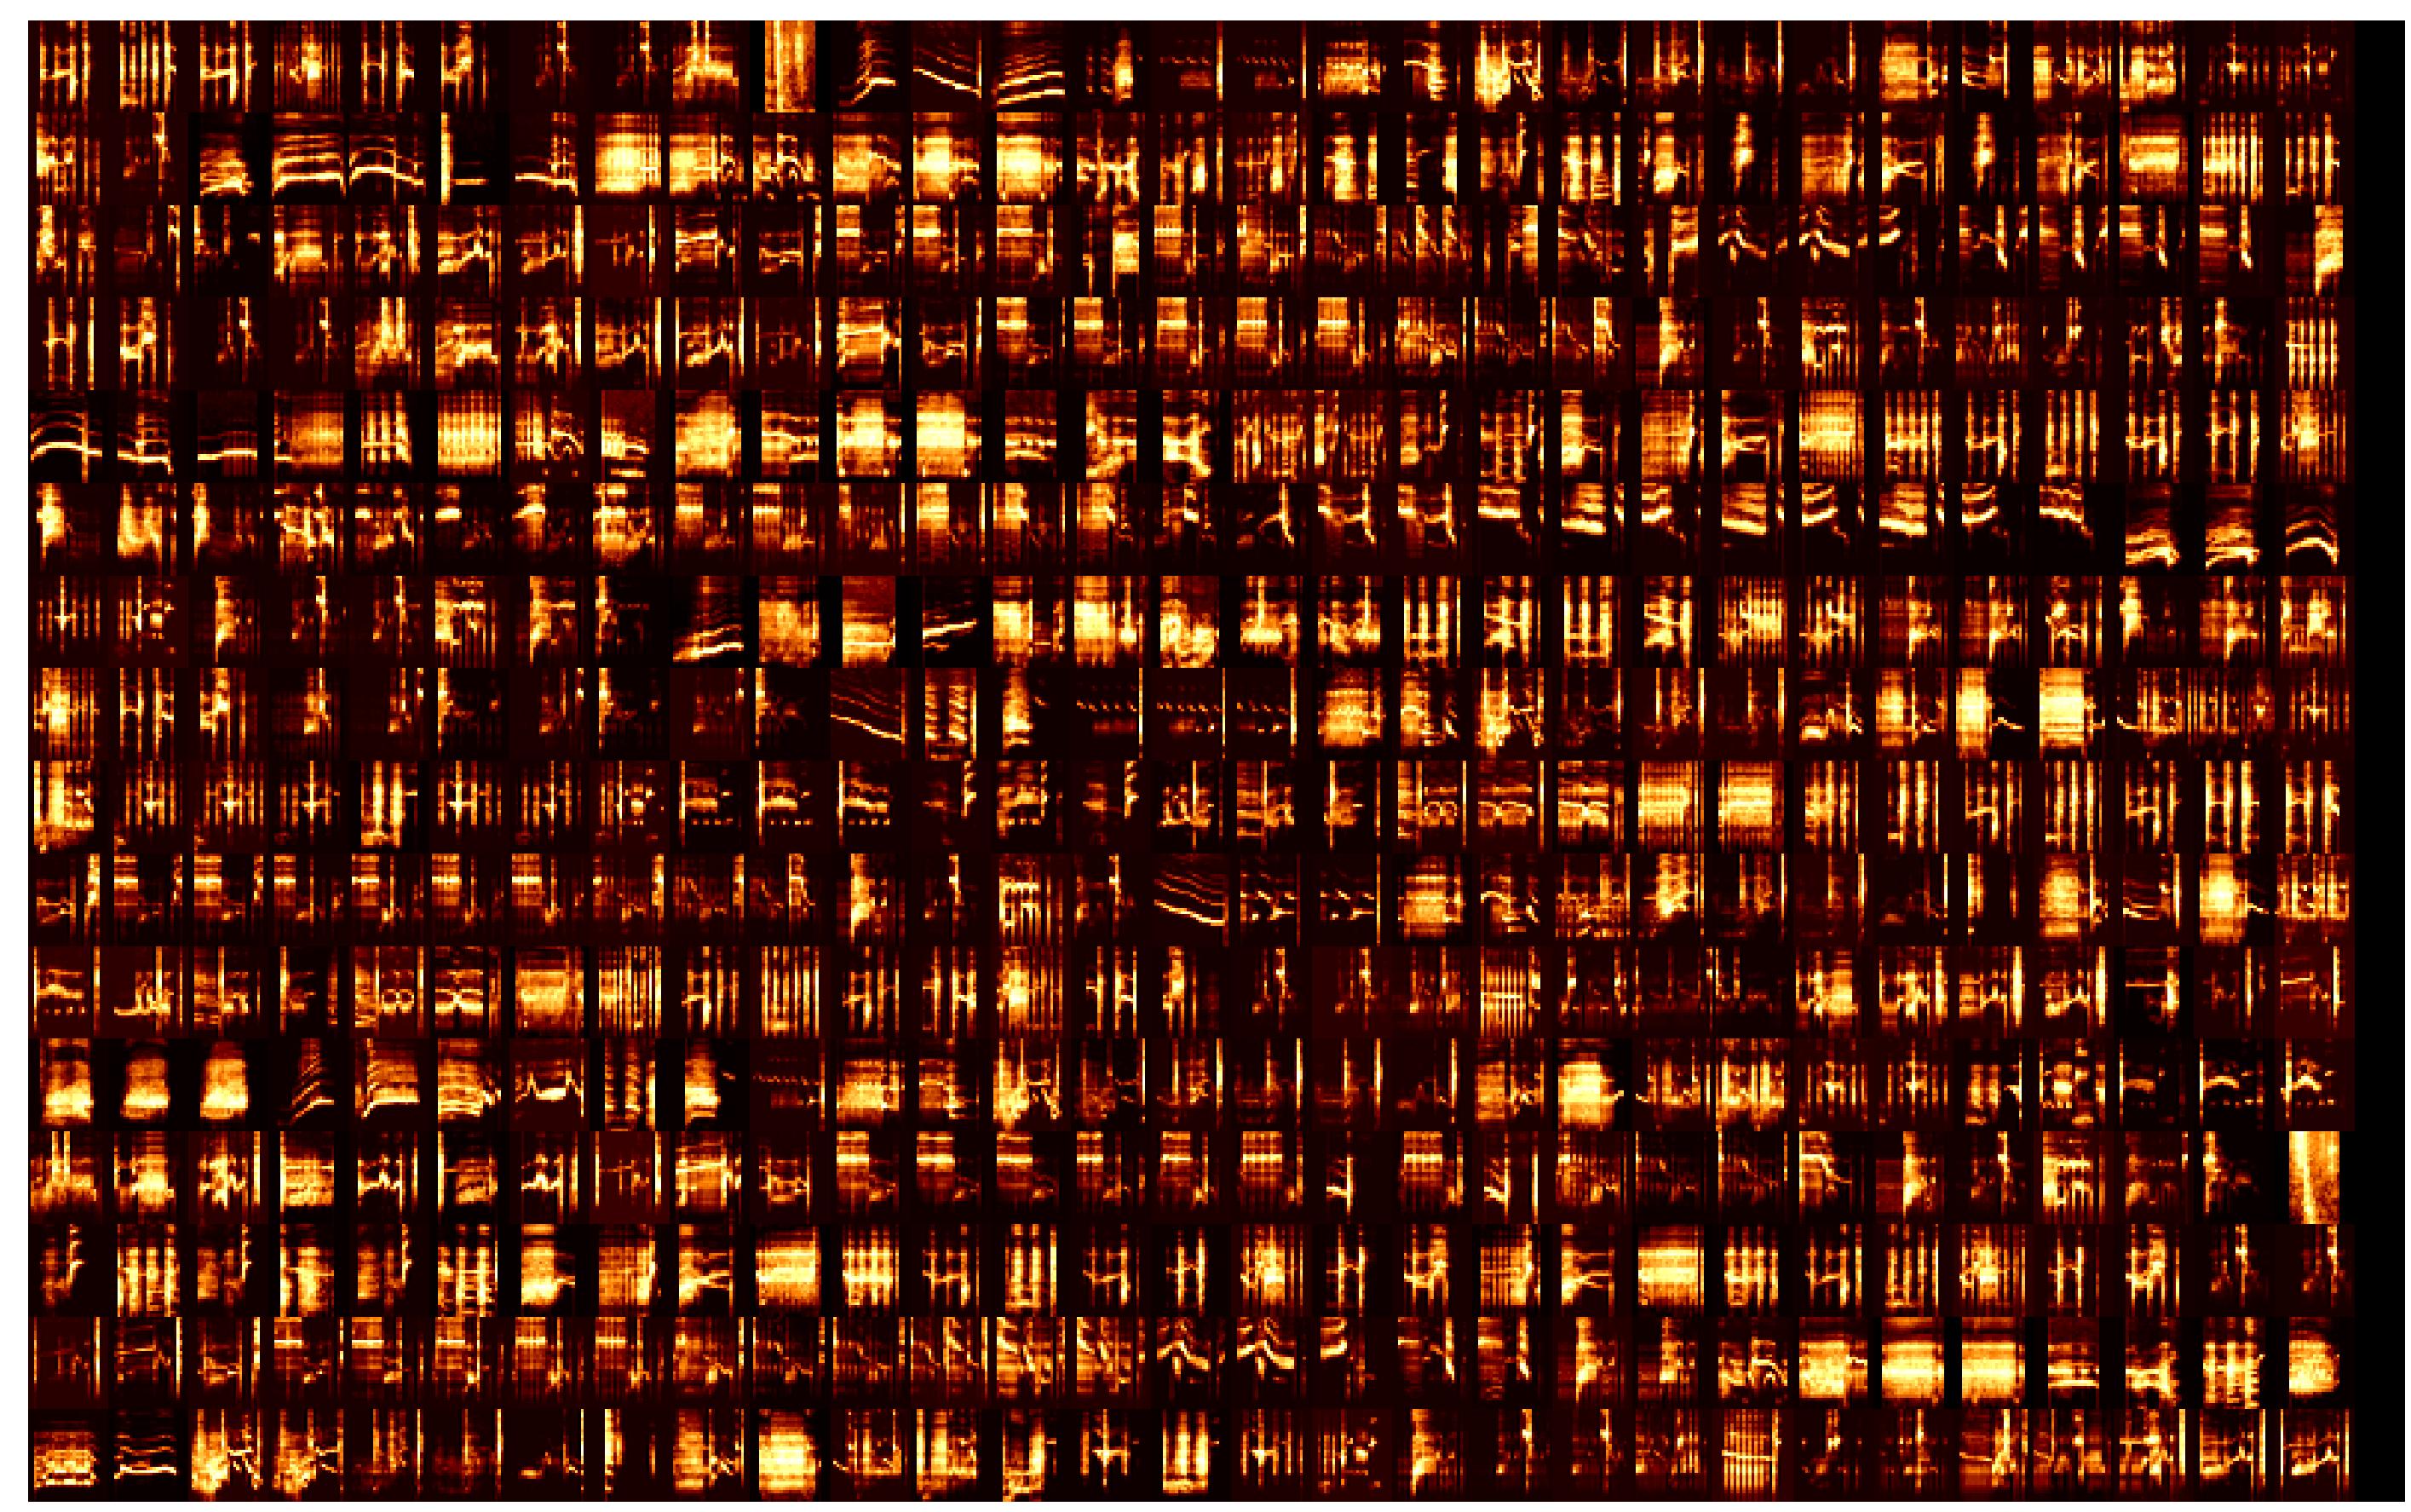

b1066 22259


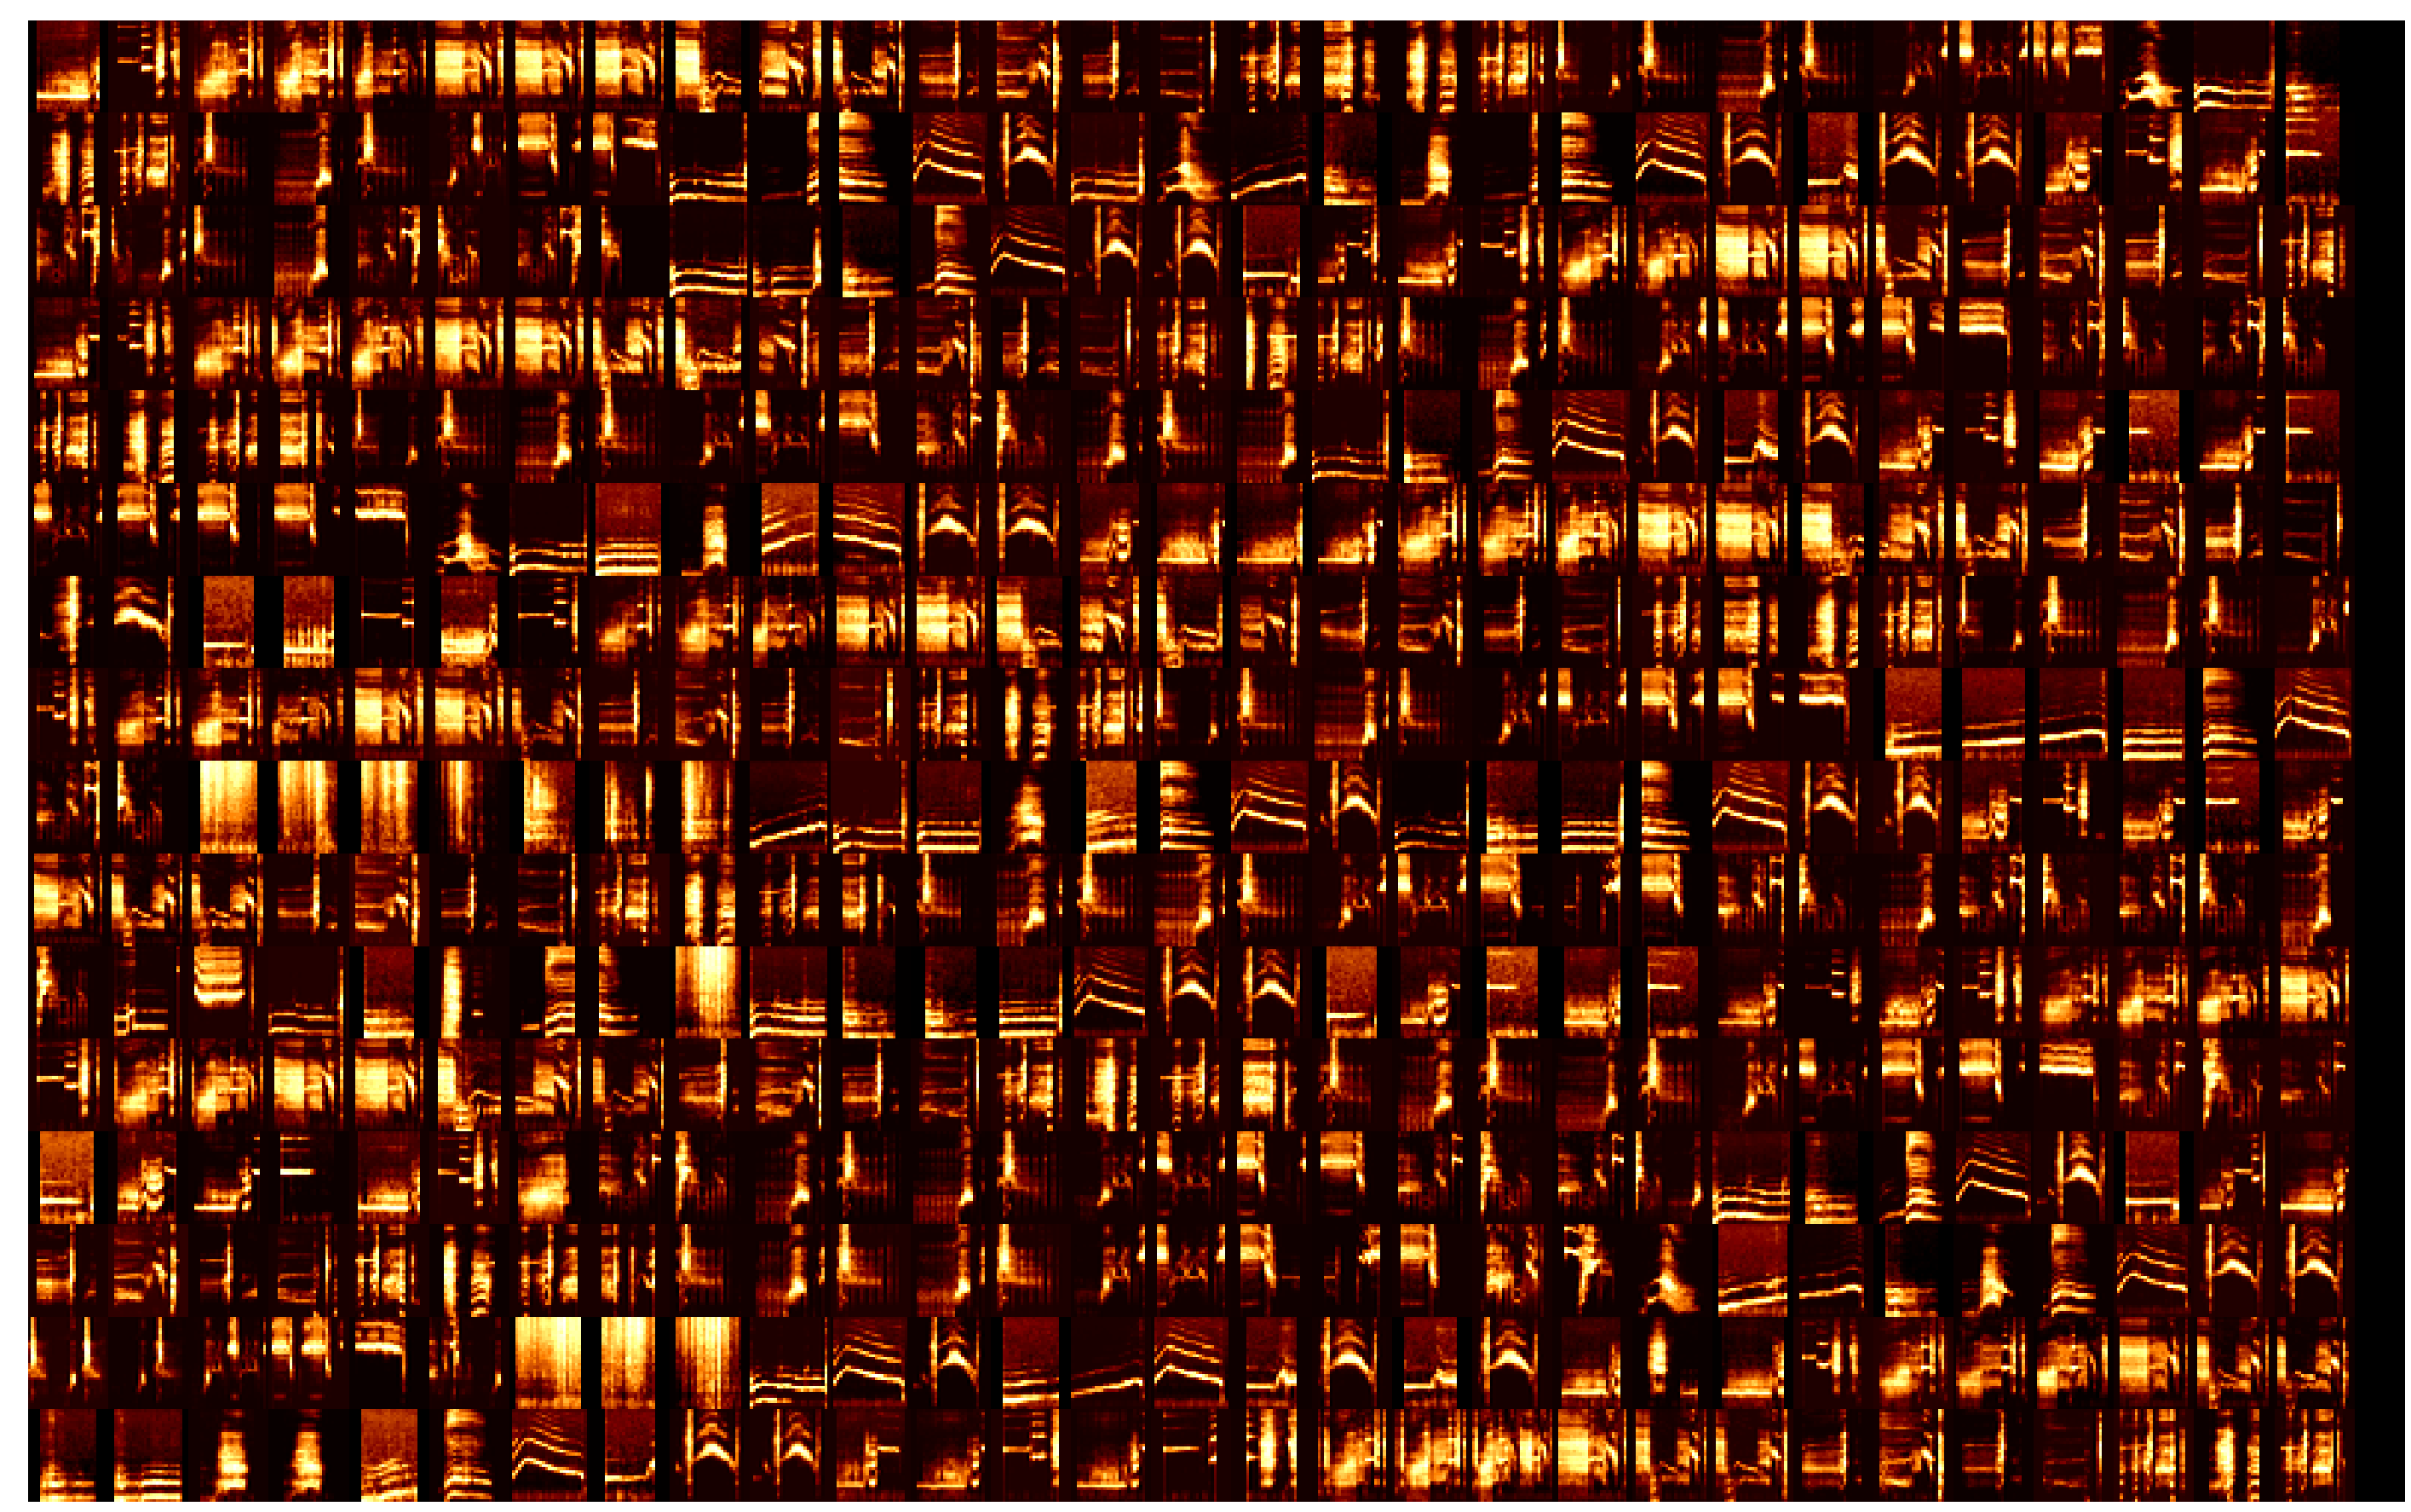

b1076 25406


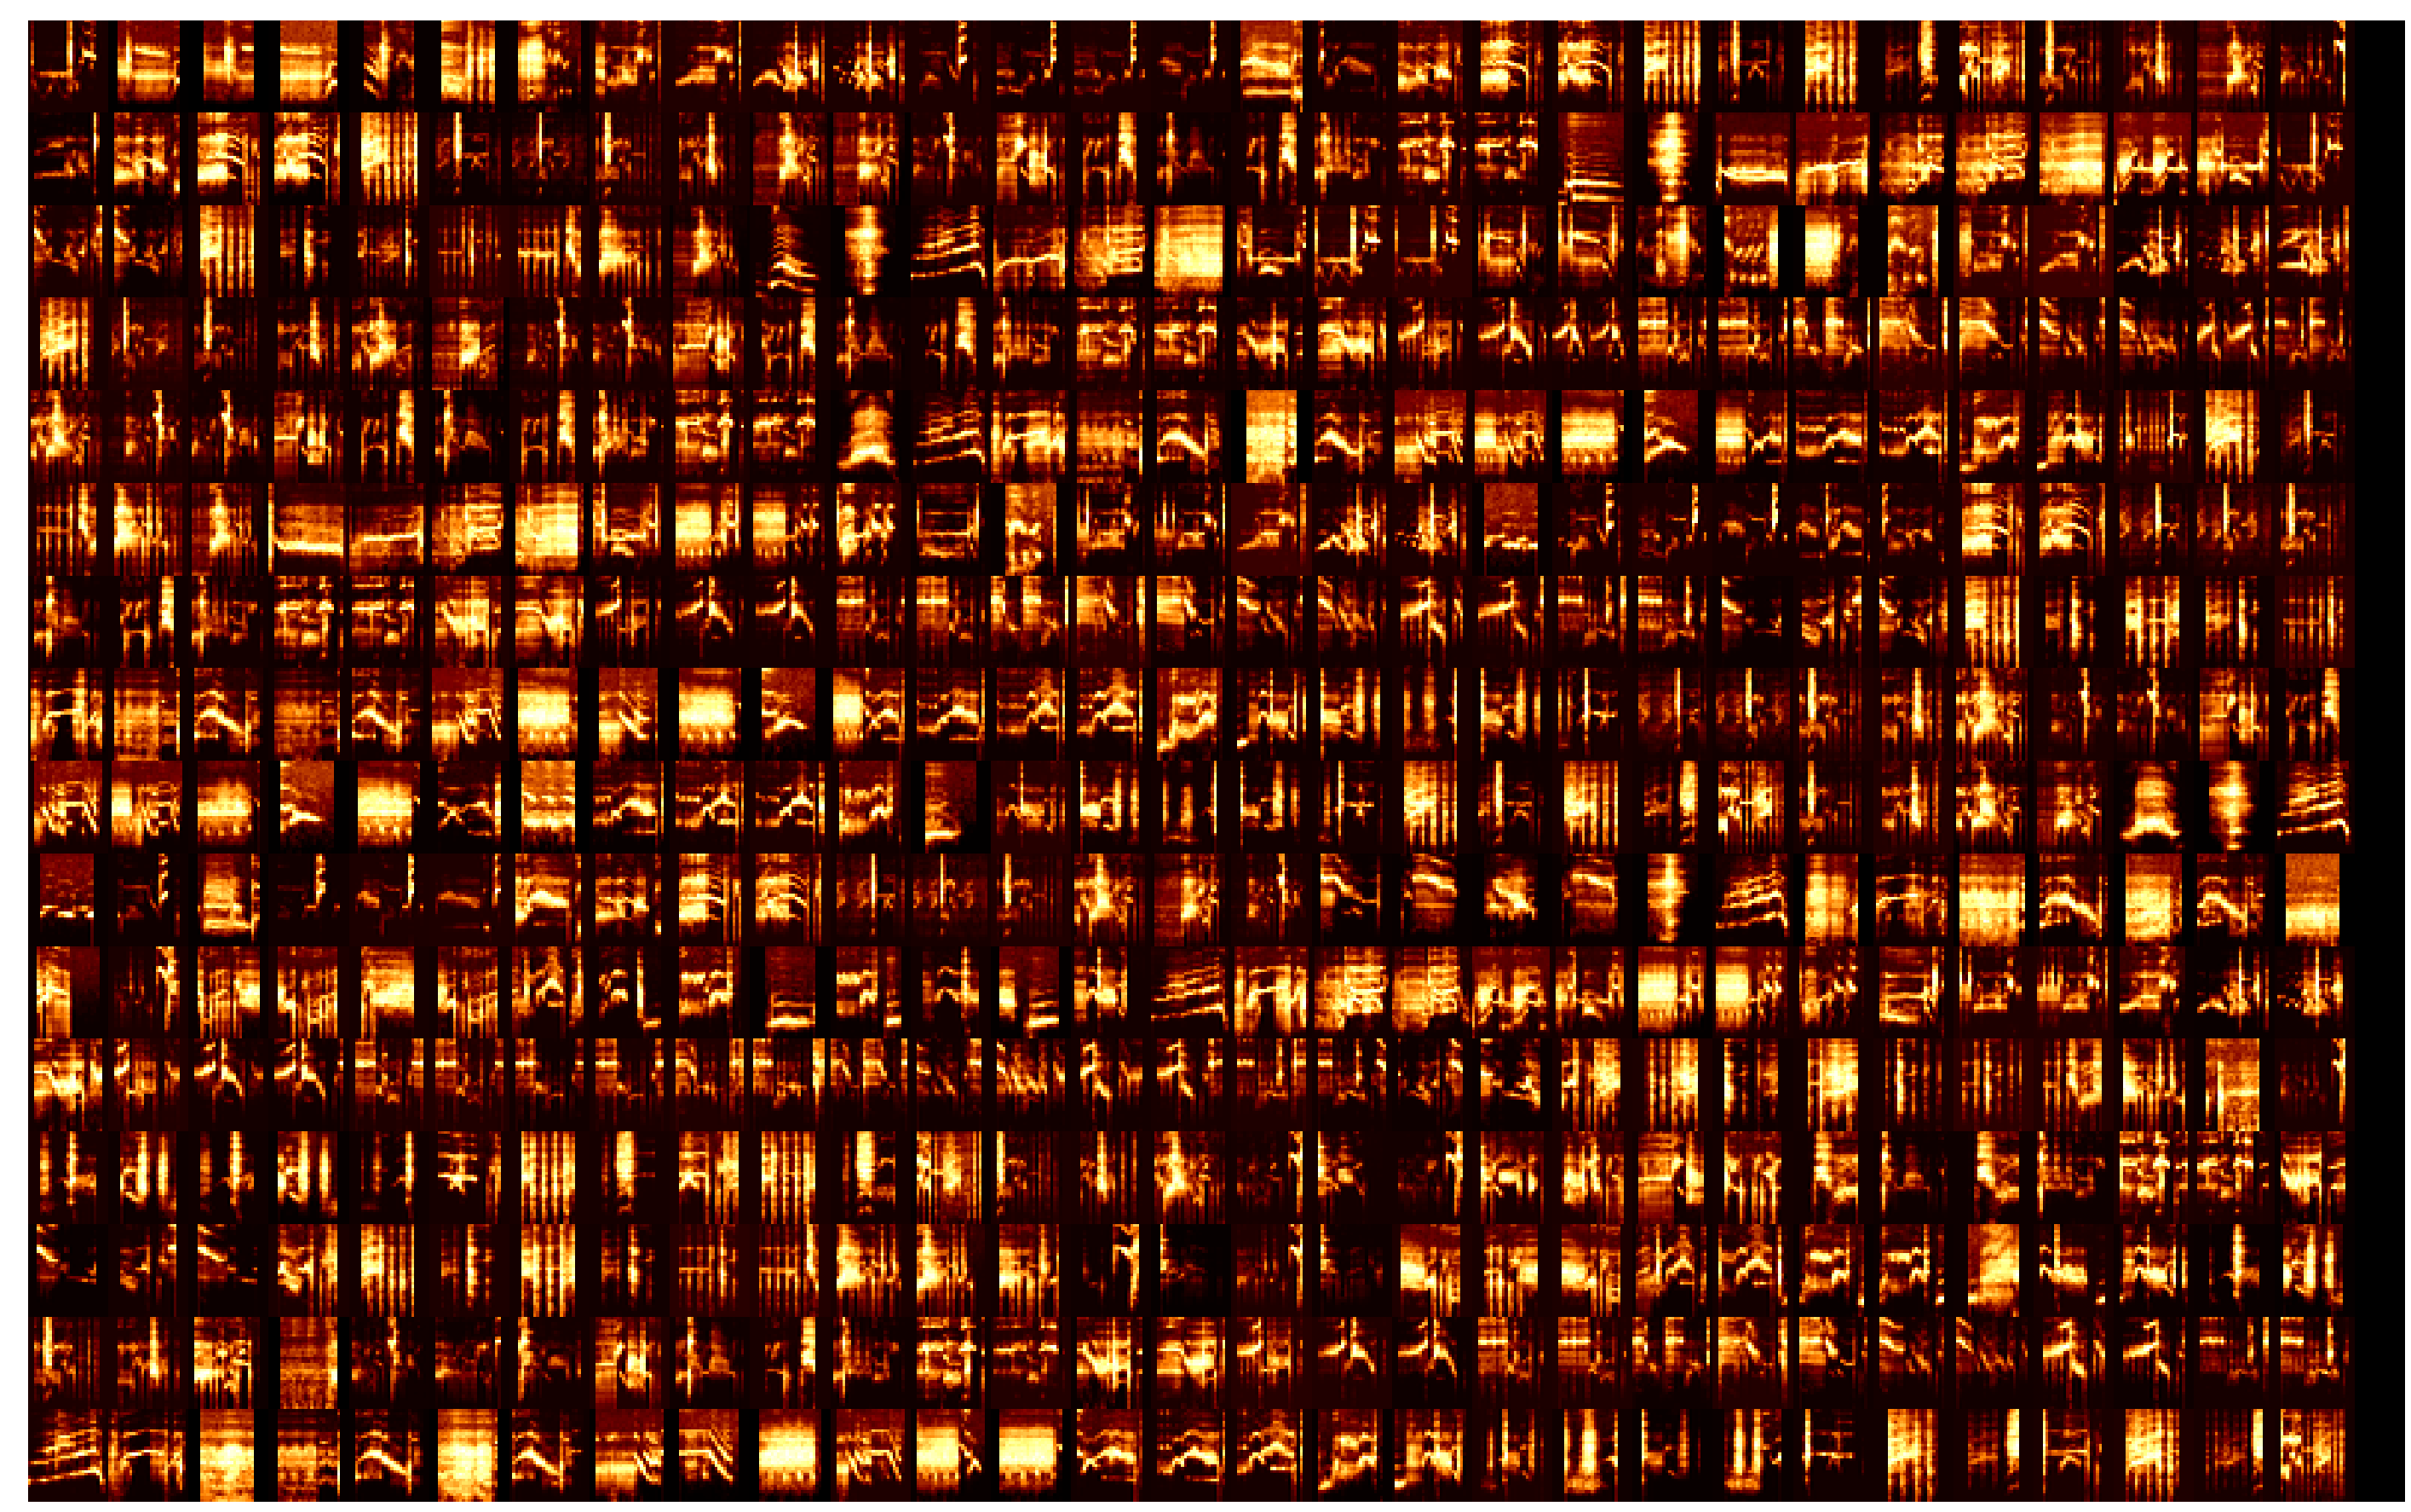

b1077 18570


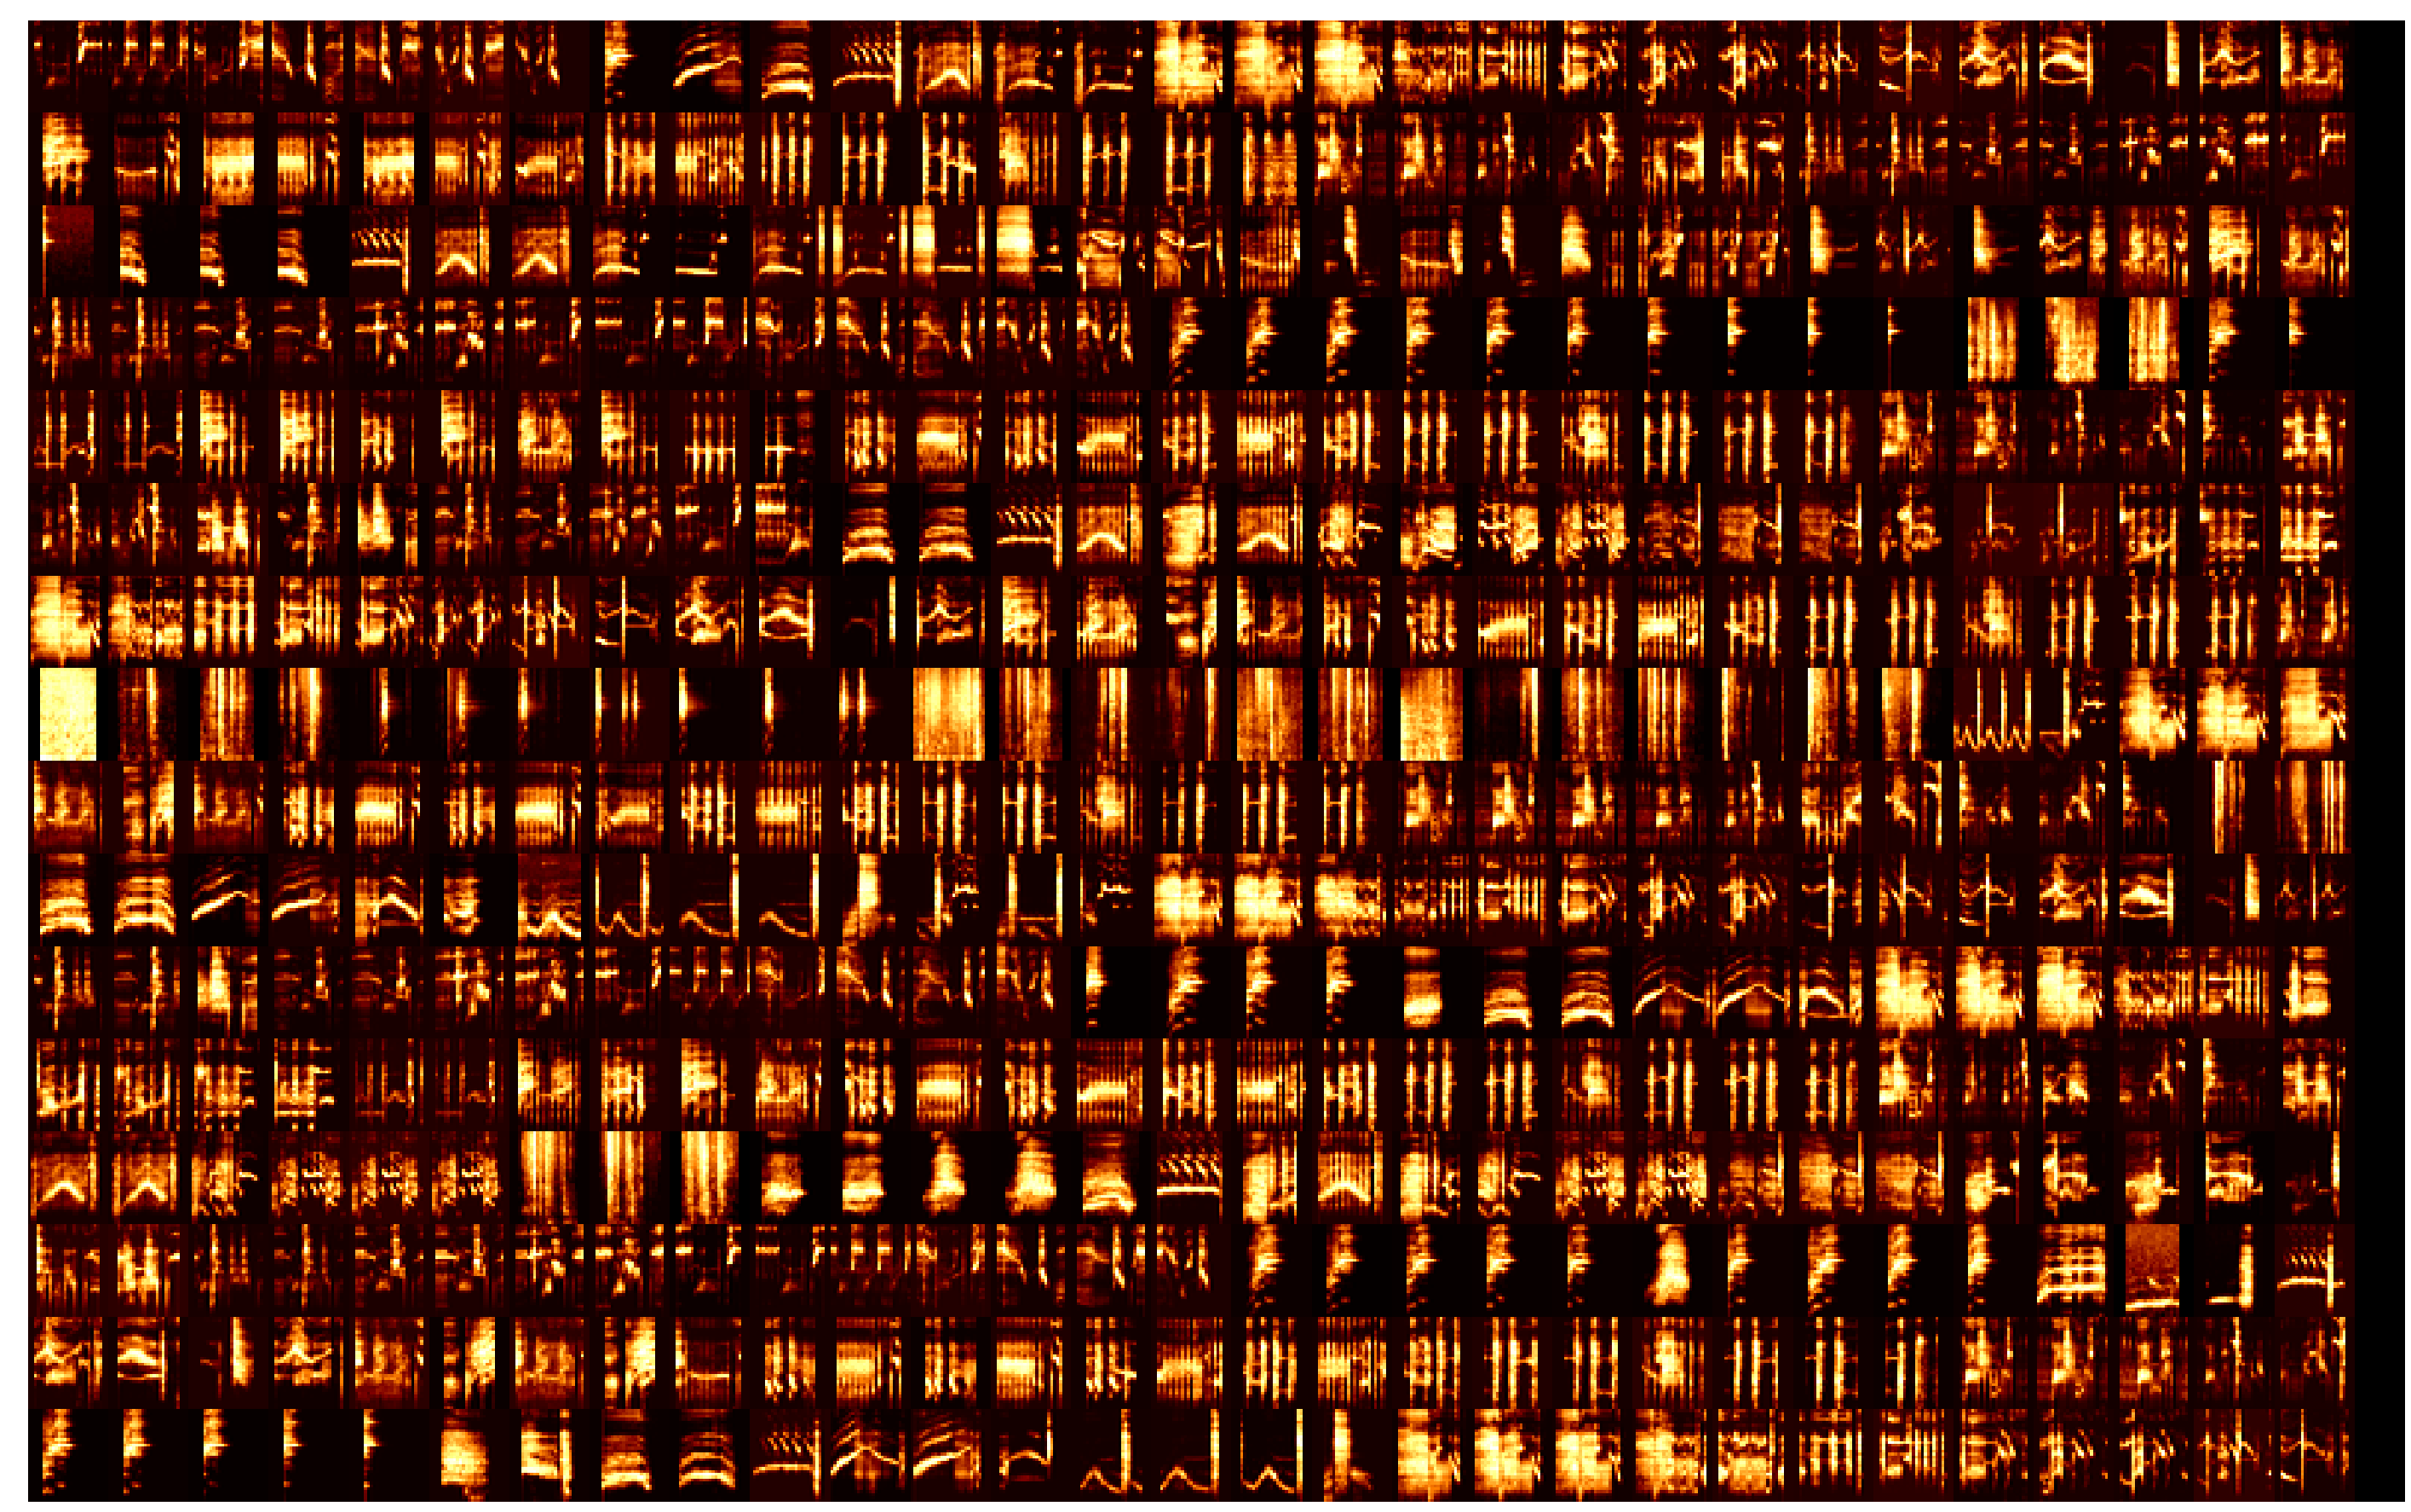

b1125 2702


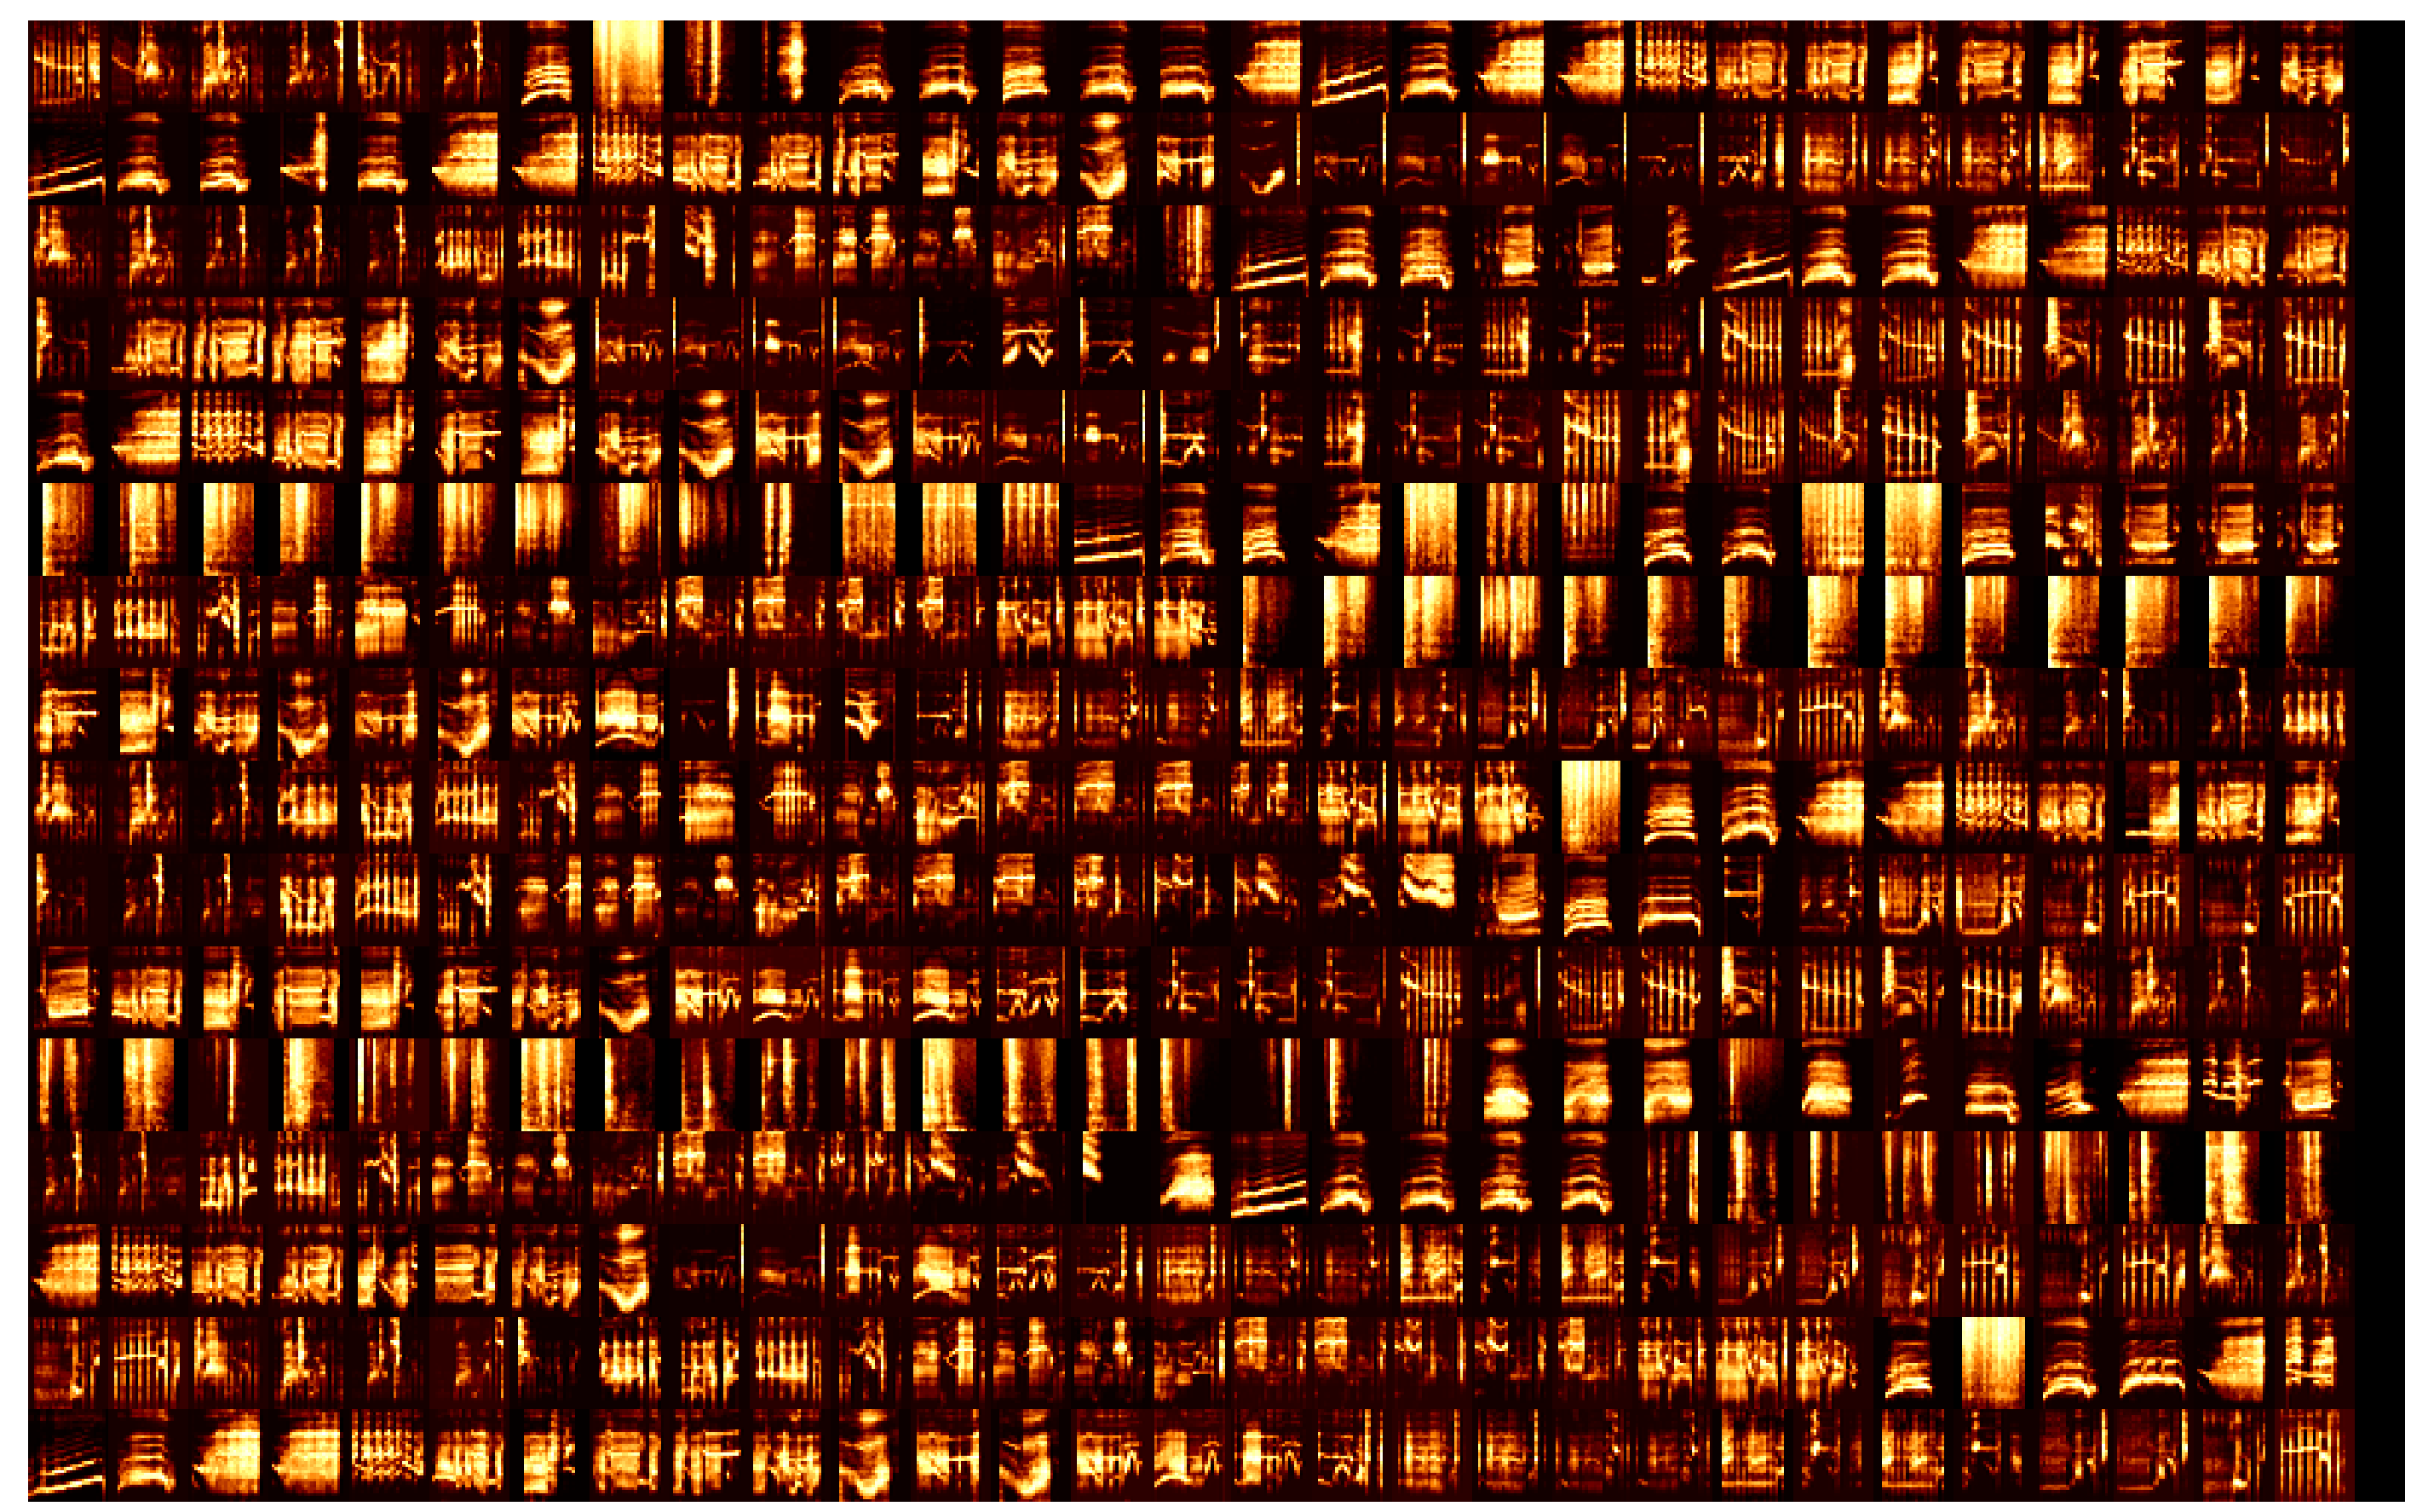

b1143 5316


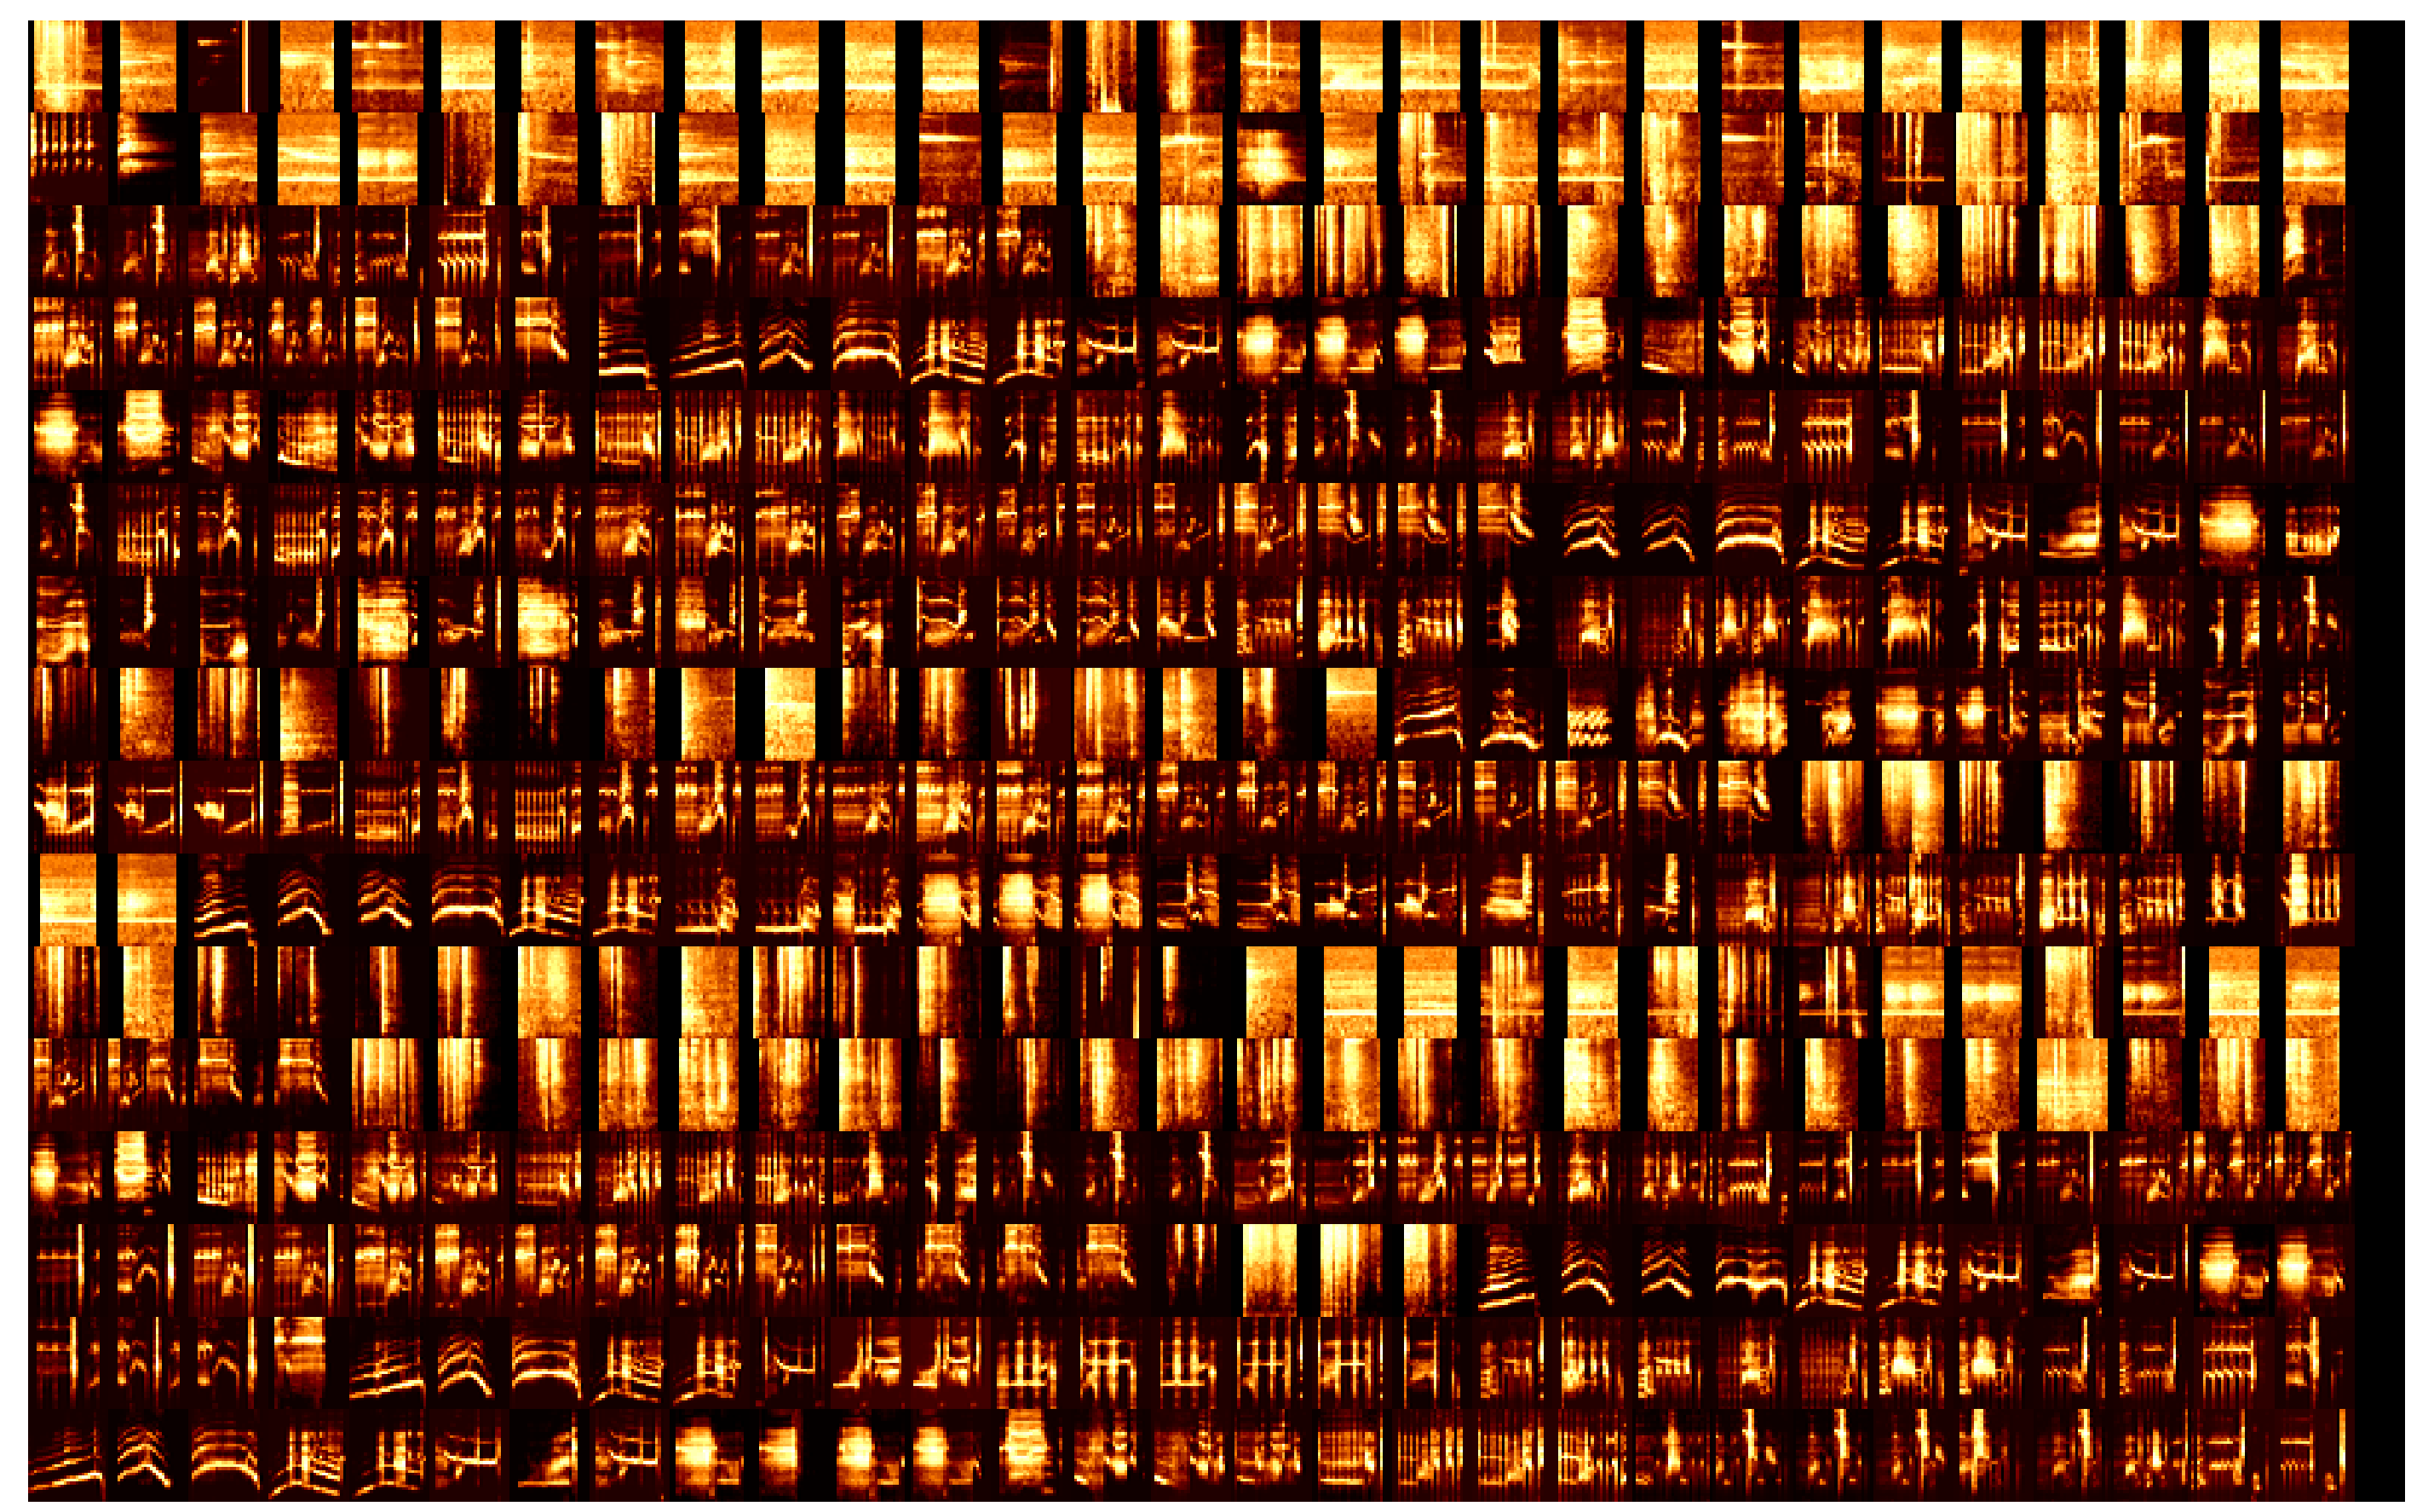

In [38]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

In [39]:
len(syllable_df)

164234

### save dataset

In [40]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'starling.pickle'
ensure_dir(save_loc)
syllable_df.drop('audio', 1).to_pickle(save_loc)